# Time Series Analysis - Step by Step

# Worked on it on 24 Aug 2021

In [39]:
# Good link for time series (not related with this notebook)

# https://www.machinelearningplus.com/time-series/time-series-analysis-python/

In [41]:
# https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA

In [2]:
data=pd.read_csv("GlobalLandTemperaturesByCity.csv")

In [3]:
data.head(20)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [4]:
data["Country"].value_counts()

India               1014906
China                827802
United States        687289
Brazil               475580
Russia               461234
                     ...   
Namibia                1881
Eritrea                1797
Djibouti               1797
Oman                   1653
Papua New Guinea       1581
Name: Country, Length: 159, dtype: int64

In [5]:
data.shape

(8599212, 7)

In [6]:
data.tail(20)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8599192,2012-02-01,0.376,0.290,Zwolle,Netherlands,52.24N,5.26E
8599193,2012-03-01,7.863,0.135,Zwolle,Netherlands,52.24N,5.26E
8599194,2012-04-01,8.101,0.168,Zwolle,Netherlands,52.24N,5.26E
8599195,2012-05-01,14.169,0.191,Zwolle,Netherlands,52.24N,5.26E
8599196,2012-06-01,14.702,0.342,Zwolle,Netherlands,52.24N,5.26E
8599197,2012-07-01,17.329,0.287,Zwolle,Netherlands,52.24N,5.26E
8599198,2012-08-01,18.588,0.224,Zwolle,Netherlands,52.24N,5.26E
8599199,2012-09-01,14.333,0.207,Zwolle,Netherlands,52.24N,5.26E
8599200,2012-10-01,10.358,0.208,Zwolle,Netherlands,52.24N,5.26E
8599201,2012-11-01,6.469,0.189,Zwolle,Netherlands,52.24N,5.26E


In [8]:
data[data["City"]=="Shahjahanpur"]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
6890596,1796-01-01,14.892,2.357,Shahjahanpur,India,28.13N,79.09E
6890597,1796-02-01,17.276,1.910,Shahjahanpur,India,28.13N,79.09E
6890598,1796-03-01,21.469,2.598,Shahjahanpur,India,28.13N,79.09E
6890599,1796-04-01,28.521,2.091,Shahjahanpur,India,28.13N,79.09E
6890600,1796-05-01,33.089,1.930,Shahjahanpur,India,28.13N,79.09E
...,...,...,...,...,...,...,...
6893204,2013-05-01,33.933,0.323,Shahjahanpur,India,28.13N,79.09E
6893205,2013-06-01,31.468,0.881,Shahjahanpur,India,28.13N,79.09E
6893206,2013-07-01,29.806,0.657,Shahjahanpur,India,28.13N,79.09E
6893207,2013-08-01,29.330,0.482,Shahjahanpur,India,28.13N,79.09E


In [9]:
# data cleaning

data=data.dropna()

In [13]:
df_denmark=data[data["Country"]=="Denmark"]
df_denmark.index=pd.to_datetime(df_denmark["dt"])
df_denmark=df_denmark.drop(["dt","AverageTemperatureUncertainty"], axis=1)
df_denmark.shape

(12664, 5)

In [14]:
df_denmark.describe()

,AverageTemperature
count,12664.000000
mean,7.802640
std,6.648288
min,-7.816000
25%,2.084000
50%,7.200000
75%,14.190500
max,21.437000


In [15]:
df_denmark.head(5)

,AverageTemperature,City,Country,Latitude,Longitude
dt,,,,,
1743-11-01,6.068,Århus,Denmark,57.05N,10.33E
1744-04-01,5.788,Århus,Denmark,57.05N,10.33E
1744-05-01,10.644,Århus,Denmark,57.05N,10.33E
1744-06-01,14.051,Århus,Denmark,57.05N,10.33E
1744-07-01,16.082,Århus,Denmark,57.05N,10.33E


In [16]:
ts=df_denmark["AverageTemperature"]

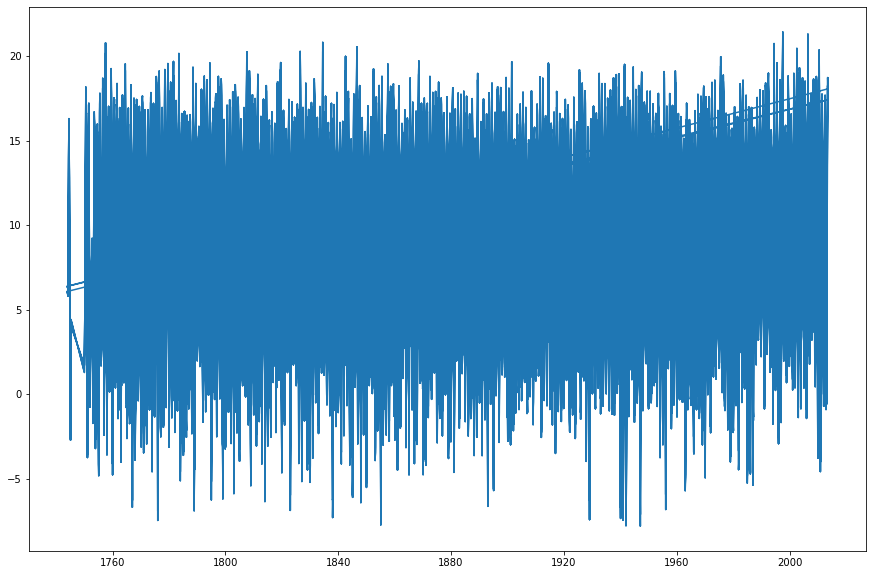

In [18]:
plt.rcParams.update({"figure.figsize": (15,10)})
plt.plot(ts)

# Step1: Check whether data is stationary or not?

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
# ADF test null hypothesis : non stationary if p-value <5% reject null hypothesis

adfuller_result=adfuller(ts, autolag="AIC")

In [21]:
print(f"ADF Statistic: {adfuller_result[0]}")
print(f"p-value: {adfuller_result[1]}")

ADF Statistic: -14.764430391800598
p-value: 2.3746970456360347e-27


In [22]:
for key, value in adfuller_result[4].items():
    print("Critical values:")
    print(f"  {key},{value} ")

Critical values:
  1%,-3.430868192869495 
Critical values:
  5%,-2.86176901566292 
Critical values:
  10%,-2.566891900059256 


In [23]:
# reject null , series is stationary

In [26]:
# first model

newmodel= ARMA(ts,order=(1,1))
results=newmodel.fit()

C:\Users\sagarw39\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sagarw39\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


In [27]:
predictions=results.predict("01/01/1990","01/01/1991")

In [31]:
actuals=df_denmark["01/01/1990":"01/01/1991"]["AverageTemperature"][0:13]

In [32]:
actuals

dt
1990-01-01     4.267
1990-02-01     5.895
1990-03-01     6.565
1990-04-01     8.068
1990-05-01    12.944
1990-06-01    15.672
1990-07-01    16.844
1990-08-01    17.402
1990-09-01    12.446
1990-10-01     9.409
1990-11-01     4.027
1990-12-01     2.547
1991-01-01     2.088
Name: AverageTemperature, dtype: float64

In [33]:
predictions

dt
1990-01-01     2.886844
1990-02-01     5.788393
1990-03-01     6.421179
1990-04-01     6.941083
1990-05-01     8.523227
1990-06-01    13.704298
1990-07-01    14.617175
1990-08-01    15.616309
1990-09-01    15.831060
1990-10-01     9.722360
1990-11-01     8.863605
1990-12-01     2.734590
1991-01-01     3.773177
dtype: float64

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
mae=mean_absolute_error(predictions,actuals)

In [36]:
print(f'mean absolute error= {mae}')

mean absolute error= 1.812791018846553


In [42]:
# hyper parameter tuning to get better mae

import itertools
i=j=range(0,4)
ij=itertools.product(i,j)
for parameters in ij:
    try:
        mod=ARMA(ts, order=parameters)
        results=mod.fit()
        print("ARMA{} - AIC:{}".format(parameters,results.aic))
    except:
        continue



ARMA(0, 0) - AIC:83922.21129983963
ARMA(0, 1) - AIC:72682.7946395372
ARMA(0, 3) - AIC:63785.44572705227
ARMA(1, 0) - AIC:69020.3114679126
ARMA(1, 1) - AIC:65268.10421609787
ARMA(1, 2) - AIC:63179.848013828014
ARMA(1, 3) - AIC:66639.6042840789
ARMA(2, 0) - AIC:60366.30909260573
ARMA(2, 2) - AIC:52219.29608733581
ARMA(2, 3) - AIC:50711.74222648103
ARMA(3, 0) - AIC:56175.94555218136
ARMA(3, 1) - AIC:53338.63499200775
ARMA(3, 2) - AIC:50395.097080347434
ARMA(3, 3) - AIC:50388.974162999075


In [43]:
predictions=results.predict("01/01/1990","01/01/1991")
mae=mean_absolute_error(predictions,actuals)

In [44]:
print("mean abosulte error after tuning is : {}".format(mae))

mean abosulte error after tuning is : 1.4947660463224883
